In [1]:
!gdown '1FdydikIZfRaENz3CLaZT24Deyc4KvZO3'

Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 11.4MB/s]


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    return [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header = 1).tolist()
  N = len(data)

  tv_data = get_column(data, 0)

  radio_data = get_column(data, 1)

  newspaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)

  X = [tv_data, radio_data, newspaper_data]
  Y = sales_data
  return X, Y

In [51]:
X, y = prepare_data('/content/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]
[624.1, 175.10000000000002, 300.5, 78.9]


In [52]:
def initialize_params():
  w1 = random.gauss(mu = 0, sigma = 0.01)
  w2 = random.gauss(mu = 0, sigma = 0.01)
  w3 = random.gauss(mu = 0, sigma = 0.01)
  b = 0
  return w1, w2, w3, b

In [53]:
def initialize_params():
  w1, w2, w3, b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
  return w1, w2, w3, b

In [54]:
def predict(x1, x2, x3, w1, w2, w3, b):
  return w1 * x1 + w2 * x2 + w3 * x3 + b

In [55]:
y_predit = predict(x1 = 1, x2 = 1, x3 = 1, w1 = 0, w2 = 0.5, w3 = 0, b = 0.5)
print(y)

[22.1, 10.4, 12.0, 16.5, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6, 12.6, 17.4, 9.2, 13.7, 19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 17.5, 5.6, 20.5, 9.7, 17.0, 15.0, 20.9, 18.9, 10.5, 21.4, 11.9, 13.2, 17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9, 8.5, 16.1, 10.6, 23.2, 19.8, 9.7, 16.4, 10.7, 22.6, 21.2, 20.2, 23.7, 5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 20.7, 14.0, 16.0, 11.3, 11.0, 13.4, 18.9, 22.3, 18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12.0, 16.0, 12.9, 16.7, 14.0, 7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4, 17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15.0, 7.2, 12.0, 5.3, 19.8, 18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 16.6, 15.2, 19.7, 10.6, 6.6, 11.9, 24.7, 9.7, 1.6, 17.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9, 19.2, 20.1, 10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 16.0, 20.6, 3.2, 15.3, 10.1, 7.3, 12.9, 16.4, 13.3, 19.9, 18.0, 11.9, 16.9, 8.0, 17.2, 17.1, 20.0, 8.4, 17

In [56]:
def compute_loss(y_hat, y):
  return (y_hat - y) ** 2

In [57]:
l = compute_loss(y_hat =1, y =0.5)
print(l)

0.25


In [58]:
def compute_gradient_wi(xi, y, y_hat):
  return (y_hat - y) * xi * 2
def compute_gradient_b(y, y_hat):
  return (y_hat - y) * 2

In [59]:
g_wi = compute_gradient_wi(xi =1.0, y =1.0, y_hat =0.5)
print(g_wi)
g_b = compute_gradient_b(y =2.0, y_hat = 0.5)
print(g_b)

-1.0
-3.0


In [60]:
def update_weight_wi(wi, dl_dwi, lr):
  return wi - lr * dl_dwi
def update_weight_b(bi, dl_db, lr):
  return bi - lr * dl_db

In [61]:
after_wi = update_weight_wi(wi =1.0, dl_dwi = -0.5, lr = 1e-5)
print(after_wi)

1.000005


In [62]:
after_b = update_weight_b(bi =0.5, dl_db = -1.0, lr = 1e-5)
print(after_b)

0.50001


In [63]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  y_data = np.array(y_data)
  N = len(y_data)

  for epoch in range(epoch_max):
    for i in range(N):
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      loss = compute_loss(y, y_hat)

      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b(y, y_hat)

      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w3 = update_weight_wi(w3, dl_dw3, lr)
      b = update_weight_b(b, dl_db, lr)

      losses.append(loss)
  return (w1, w2, w3, b, losses)

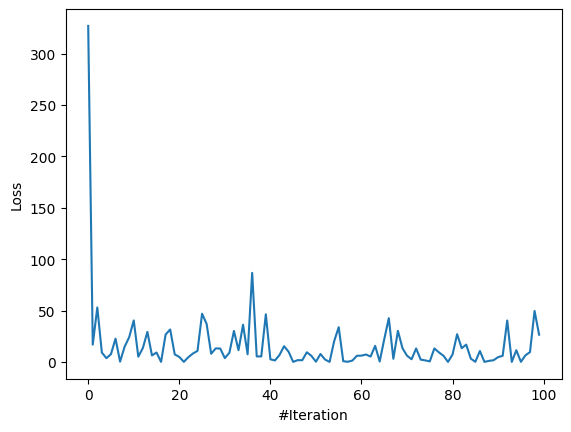

In [65]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#Iteration")
plt.ylabel("Loss")
plt.show()

In [66]:
print( w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [67]:
tv = 19.2
radio = 35.9
newspaper = 51.3
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print (f'Predicted sales is { sales }')

Predicted sales is 8.176413319549823


In [68]:
def compute_loss_mae(y_hat, y):
  return abs(y_hat - y)

l = compute_loss_mae(y_hat =1, y =0.5)
print(l)

0.5


In [69]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize weights and bias
    w1, w2, w3, b = initialize_params()

    y_data = np.array(y_data)
    N = len(y_data)  # Number of samples

    for epoch in range(epoch_max):
        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # Prediction
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss(y, y_hat)
            loss_total += loss

            # Compute gradients
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Update weights and bias after each epoch
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        # Average loss for the epoch
        losses.append(loss_total / N)

    return (w1, w2, w3, b, losses)


[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

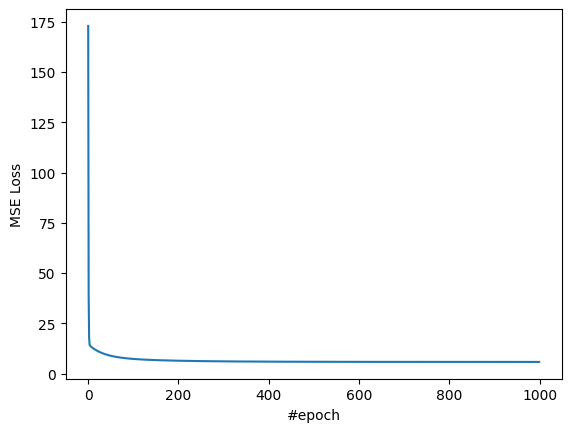

In [70]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max = 1000, lr = 1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()


In [71]:
X , y = prepare_data ('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max =1000, lr = 1e-5)

In [72]:
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [73]:
def get_column(data, index):
    return [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header = 1).tolist()
  N = len(data)

  tv_data = get_column(data, 0)

  radio_data = get_column(data, 1)

  newspaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)

  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  Y = sales_data
  return X, Y

In [98]:
def predict(X_features, weights):
  y = X_features[0] * weights[0] + X_features[1] * weights[1] + X_features[2] * weights[2] + weights[3]
  return y

In [75]:
def compute_loss(y, y_hat):
  return (y_hat - y) ** 2

In [100]:
def compute_gradient_wi(X_features, y, y_hat):
  y_hat = np.array(y_hat)
  X_features = np.array(X_features)
  y = np.array(y)
  return (y_hat - y) * X_features

In [115]:
def update_weight(weights, dl_dweights, lr):
  weights = np.array(weights)
  dl_dweights = np.array(dl_dweights)
  dl_dweights = np.sum(dl_dweights)
  print(dl_dweights)
  return weights - lr * dl_dweights

In [91]:
def implement_linear_regression(X_feature, y, epoch_max=50, lr=1e-5):
  losses = []
  weights = initialize_params()
  N = len(y)
  for epoch in range(epoch_max):
    for i in range(N):
      x_features = X_feature[i]
      y_val = y[i]  # Using y_val to avoid shadowing parameter 'y'
      y_hat = predict(x_features, weights)
      loss = compute_loss(y_val, y_hat)
      dl_weights = compute_gradient_wi(x_features, y_val, y_hat)
      weights = update_weight(weights, dl_weights, lr)
      losses.append(loss)
  return weights, losses

In [116]:
W , L = implement_linear_regression(X, y,epoch_max =50, lr =1e-5)
plt.plot(L)
plt.show()

-526847.0740089838
2995030.2898204597
-27907602.27538596


IndexError: list index out of range

In [ ]:
print ( L[9999])